### Simple Binomial European Option Pricing Model

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
S0 = 100      # initial stock price
K = 100       # strike price
T = 1        
r = 0.06     
N = 3         
u = 1.1       
d = 1 / u     

In [15]:
def binomial_tree_slow(K, T, S0, r, N, u, d, opttype='C'):
    dt = T / N
    q = (1 + r * dt - d) / (u - d)  
    disc = 1 / (1 + r * dt)          

    S = np.zeros(N + 1)
    S[0] = S0 * d ** N
    for j in range(1, N + 1):
        S[j] = S[j - 1] * u / d

    C = np.zeros(N + 1)
    for j in range(0, N + 1):
        if opttype == 'C':
            C[j] = max(0, S[j] - K)  
        else:
            C[j] = max(0, K - S[j])  

    # Step backwards through the tree
    for i in np.arange(N, 0, -1):
        for j in range(0, i):
            C[j] = disc * (q * C[j + 1] + (1 - q) * C[j])

    return C[0]

price = binomial_tree_slow(K, T, S0, r, N, u, d, opttype)
print("Option Price:", price)

Option Price: 10.113947224370019


### Visualizing the Tree

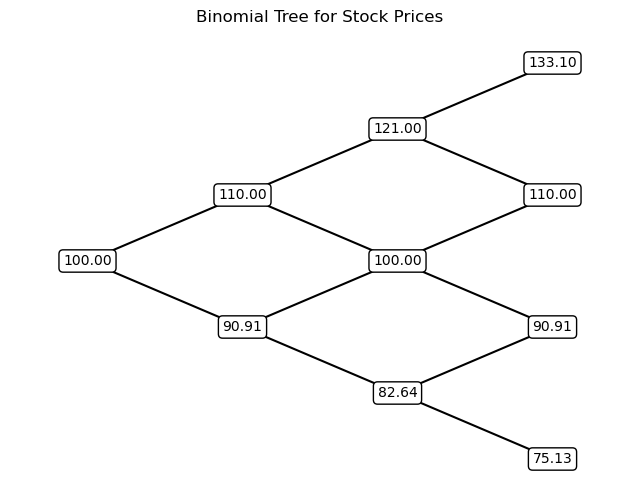

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def draw_binomial_tree(S0, u, d, N):
    S = np.zeros((N+1, N+1))
    S[0, 0] = S0

    for i in range(1, N+1):
        S[i, 0] = S[i-1, 0] * d  # Down move
        for j in range(1, i+1):
            S[i, j] = S[i-1, j-1] * u  # Up move

    fig, ax = plt.subplots(figsize=(8, 6))
    
    for i in range(N+1):
        for j in range(i+1):
            ax.text(i, j*2 - i, f'{S[i, j]:.2f}', ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
    for i in range(N):
        for j in range(i+1):
            ax.plot([i, i+1], [j*2 - i, j*2 - i+1], 'k-')  # Up move
            ax.plot([i, i+1], [j*2 - i, j*2 - i-1], 'k-')  # Down move
    
    ax.set_xlim(-0.5, N+0.5)
    ax.set_ylim(-N-0.5, N+0.5)
    ax.axis('off')
    
    plt.title('Binomial Tree for Stock Prices')
    plt.show()      

draw_binomial_tree(S0, u, d, N)